We read the same excel file as before, and remove nulls

In [1]:
import pandas as pd
df = pd.read_excel("../Data/Amazon 2_Raw.xlsx")
df.dropna(how='any', inplace=True)

Extract year and month attributes

In [2]:
df['Month'] = df['Ship Date'].dt.month
df['Year'] = df['Ship Date'].dt.year

# Raw Data

In [3]:
df.sample(10)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,Month,Year
1145,CA-2014-141929,2014-09-05,2014-09-09,RalphArnett@gmail.com,"United States,Los Angeles,California",Phones,QVS USB Car Charger 2-Port 2.1Amp for iPod/iPh...,5.560,1,1.7375,9,2014
3067,CA-2013-130638,2013-05-17,2013-05-20,SanjitChand@gmail.com,"United States,Los Angeles,California",Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",282.840,4,19.7988,5,2013
653,CA-2014-124401,2014-09-08,2014-09-13,RubenDartt@gmail.com,"United States,Portland,Oregon",Storage,Hanging Personal Folder File,37.680,3,2.3550,9,2014
2328,CA-2014-137414,2014-10-03,2014-10-07,ChadMcGuire@gmail.com,"United States,San Francisco,California",Machines,Ricoh - Ink Collector Unit for GX3000 Series P...,369.160,11,32.3015,10,2014
2597,CA-2013-151498,2013-04-22,2013-04-25,DuaneNoonan@gmail.com,"United States,Seattle,Washington",Binders,Round Ring Binders,8.320,5,2.8080,4,2013
760,CA-2014-108574,2014-10-08,2014-10-12,MikeGockenbach@gmail.com,"United States,Los Angeles,California",Accessories,Logitech G19 Programmable Gaming Keyboard,1115.910,9,200.8638,10,2014
2589,CA-2014-131807,2014-10-06,2014-10-11,GregGuthrie@gmail.com,"United States,Chico,California",Furnishings,DAX Clear Channel Poster Frame,72.900,5,26.9730,10,2014
2028,CA-2012-133445,2012-10-05,2012-10-09,JeremyFarry@gmail.com,"United States,Portland,Oregon",Bookcases,"Bush Cubix Collection Bookcases, Fully Assembled",66.294,1,-103.8606,10,2012
1418,US-2011-138247,2011-12-24,2011-12-29,BenFerrer@gmail.com,"United States,Los Angeles,California",Appliances,Avanti 4.4 Cu. Ft. Refrigerator,361.960,2,101.3488,12,2011
605,CA-2012-109939,2012-05-08,2012-05-12,AllenArmold@gmail.com,"United States,Salem,Oregon",Art,Newell 321,5.248,2,0.5904,5,2012


Get total profit by order date then plot it.

<Axes: xlabel='Order Date'>

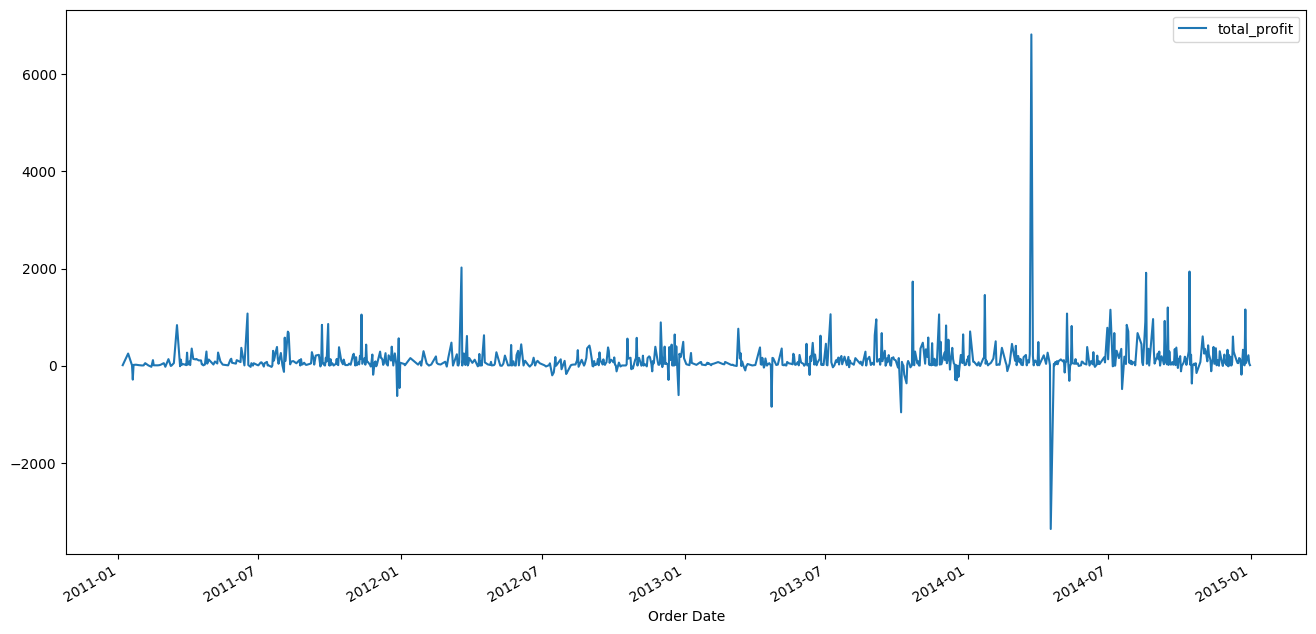

In [4]:

df.groupby('Order Date').agg(total_profit = ('Profit', 'sum')) \
    .reset_index() \
    .plot(kind='line', x='Order Date', y = 'total_profit', figsize = (16,8))
    
    

# Less Granular

In [5]:
df_less_granular = df.resample('1Y', on = 'Order Date')['Profit'].sum()
df_less_granular
# No more "day/month" level data
# Cannot drill down anymore

/tmp/ipykernel_21778/2805178247.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_less_granular = df.resample('1Y', on = 'Order Date')['Profit'].sum()


Order Date
2011-12-31    20065.6912
2012-12-31    20492.1947
2013-12-31    23959.9374
2014-12-31    43900.6256
Freq: YE-DEC, Name: Profit, dtype: float64

<Axes: xlabel='Order Date'>

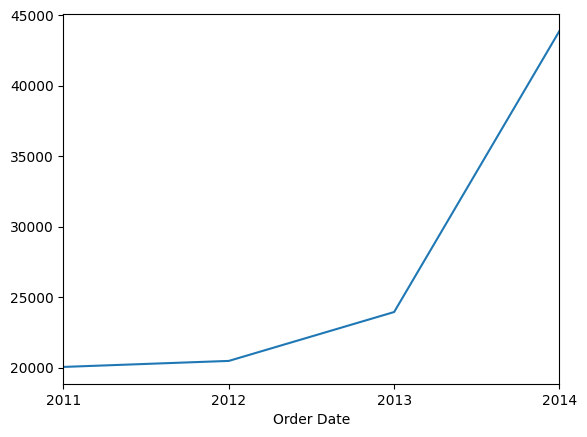

In [6]:
df_less_granular.plot.line()